In [ ]:
# import packages
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [ ]:
#load the data
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape #check the shape

(60000, 28, 28)

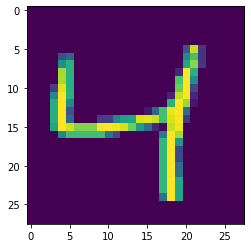

In [ ]:
#plotting the image 
plt.imshow(x_train[2])
plt.show()


In [ ]:
#checking the shape of y_train
y_train.shape

(60000,)

In [ ]:
x_train[50]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  12,  56, 140,
        126, 175, 200,  96,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  35, 166, 238, 254, 246,
        242, 253, 246, 254,  67,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
# flattening of our matrix to a vector of input_shape 784
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])

In [ ]:
#flattening of our test_data
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
y_train[5]

2

In [ ]:
#converting it into a one-hot encoding form
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

Normalizing the images
We divide each pixel of the image in the training and test sets by the maximum number of pixels (255).

In this way each pixel will be in the range [0, 1]. By normalizing images we make sure that our model (ANN) trains faster.

In [ ]:
#normalization of the x_train and x_test : Now to pixel intensity values will change from 0-255 to 0-1
x_train = x_train/255
x_test = x_test/255

In [ ]:
#defining the type of model
model = Sequential()

In [ ]:
#building the model
model.add(Dense(64,activation='relu',input_shape = (784,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
#getting the summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile the model by giving the loss function and the type of optimizer you need
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [ ]:
#train the data
history = model.fit(x_train,y_train,batch_size = 200, epochs = 10)

Epoch 1/10
300/300 [==============================] - 2s 4ms/step - loss: 0.9284 - accuracy: 0.7126
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2245 - accuracy: 0.9343
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1576 - accuracy: 0.9541
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1237 - accuracy: 0.9635
Epoch 5/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1061 - accuracy: 0.9688
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0875 - accuracy: 0.9733
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0806 - accuracy: 0.9753
Epoch 8/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0668 - accuracy: 0.9811
Epoch 9/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0602 - accuracy: 0.9828
Epoch 10/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0535 - accuracy: 0.9833

In [ ]:
#evaluating the model using test data
score = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0971 - accuracy: 0.9702


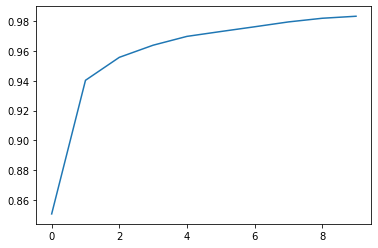

In [ ]:
#plotting the accuracy
plt.plot(history.history['accuracy'])
plt.show()

In [ ]:
#predicting the values
predicted_values = model.predict(x_test[:10])
print(np.argmax(predicted_values,axis = 1))

[7 2 1 0 4 1 4 9 6 9]


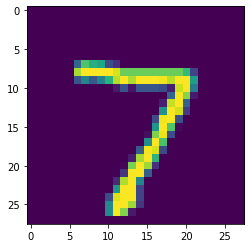

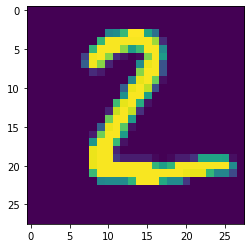

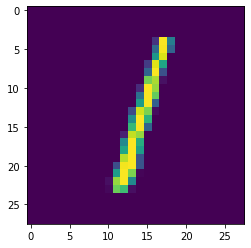

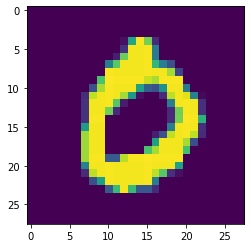

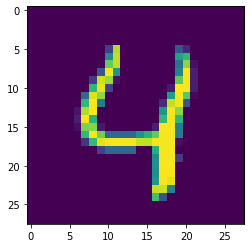

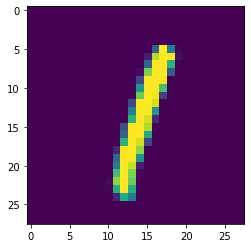

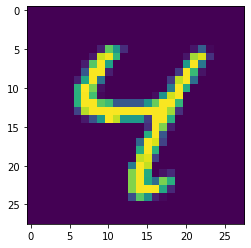

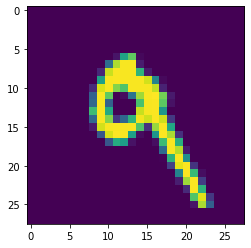

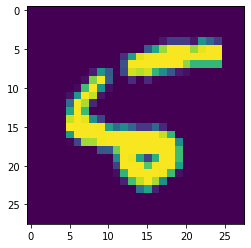

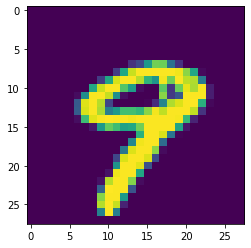

In [ ]:
#plotting the predicted values to check the prediction
for i in range(0,10):
  image = x_test[i]
  image = np.array(image,dtype = 'float')
  pixels = image.reshape((28,28))
  plt.imshow(pixels)
  plt.show()